In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [17]:
image_size = 256
batch_size = 32
channels = 3
epochs = 15

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(image_size, image_size),
    batch_size=batch_size
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

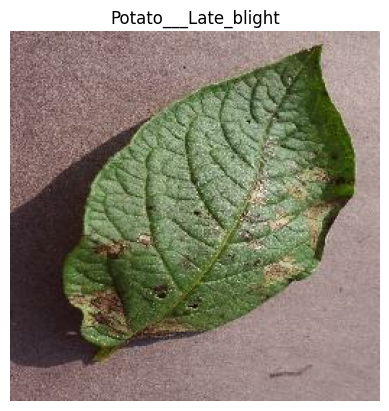

In [6]:
for image_batch, label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype("uint8"))
  plt.title(class_names[label_batch[0]])
  plt.axis("off")

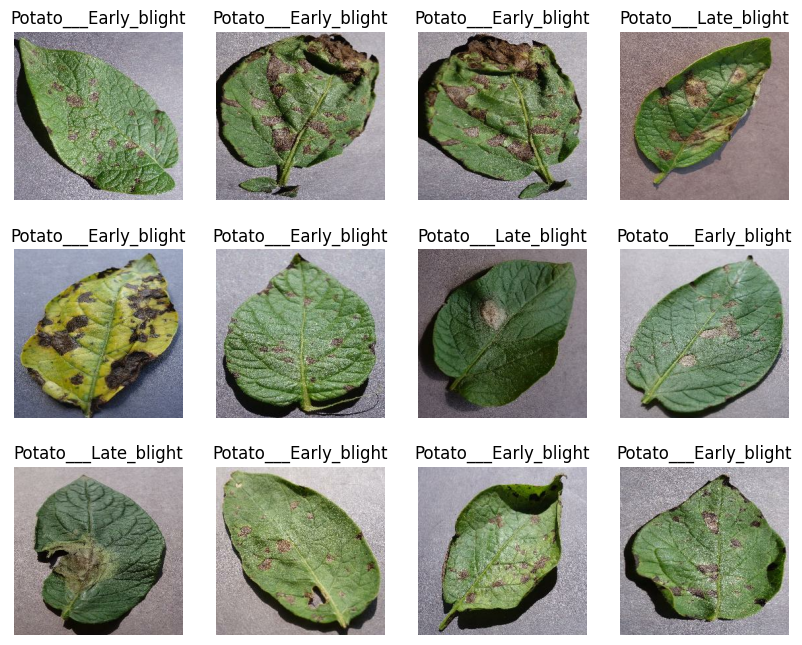

In [7]:
plt.figure(figsize=(10, 8))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

# Train Test Split
80% train
10% validation
10% test

In [8]:
def get_partion_tf(ds , train_size=0.8, val_size=0.1, shuffle=True):
  if shuffle:
    ds = ds.shuffle(len(ds))

  train_size = int(len(ds)*train_size)
  train_ds = ds.take(train_size)
  test_ds = ds.skip(train_size)
  val_size = int(len(ds)*val_size)
  val_ds = test_ds.take(val_size)
  test_ds = test_ds.skip(val_size)
  return train_ds, val_ds, test_ds

In [9]:
train_ds, val_ds, test_ds = get_partion_tf(dataset)

In [10]:
print(len(train_ds), len(val_ds), len(test_ds))

54 6 8


# Preprocessing

we will be creating layers  for resize and rescale, data augmentation

Then use these layers in model training

In [11]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [12]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(256, 256),
    layers.Rescaling(1.0/255)
])

In [13]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

# Model Implementation

we will be using CNN model

In [14]:
from types import new_class
input_shape = (batch_size, image_size, image_size, channels)
n_class = 3

model =models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(n_class, activation='softmax')
])
model.build(input_shape=input_shape)

In [15]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 1152)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 32)               │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,883 (292.51 KB)

 Trainable params: 74,883 (292.51 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'])

In [18]:
model.fit(
    train_ds,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=val_ds,
    verbose=1)

Epoch 1/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 172s 3s/step - accuracy: 0.4806 - loss: 0.9459 - val_accuracy: 0.5677 - val_loss: 0.7897
Epoch 2/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - accuracy: 0.7002 - loss: 0.7356 - val_accuracy: 0.8177 - val_loss: 0.4755
Epoch 3/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 206s 3s/step - accuracy: 0.8392 - loss: 0.4217 - val_accuracy: 0.8542 - val_loss: 0.3404
Epoch 4/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step - accuracy: 0.8509 - loss: 0.3370 - val_accuracy: 0.8438 - val_loss: 0.3323
Epoch 5/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.8931 - loss: 0.2583 - val_accuracy: 0.8750 - val_loss: 0.3241
Epoch 6/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.8939 - loss: 0.2512 - val_accuracy: 0.8906 - val_loss: 0.2234
Epoch 7/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step - accuracy: 0.9279 - loss: 0.1841 - val_accuracy: 0.9167 - val_loss: 0.1772
Epoch 8/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.9299 - loss: 0.1980 - val_accuracy: 0.9479 - v

In [19]:
score = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 689ms/step - accuracy: 0.9835 - loss: 0.0646


In [20]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array, 0)

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])), 2)
  return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


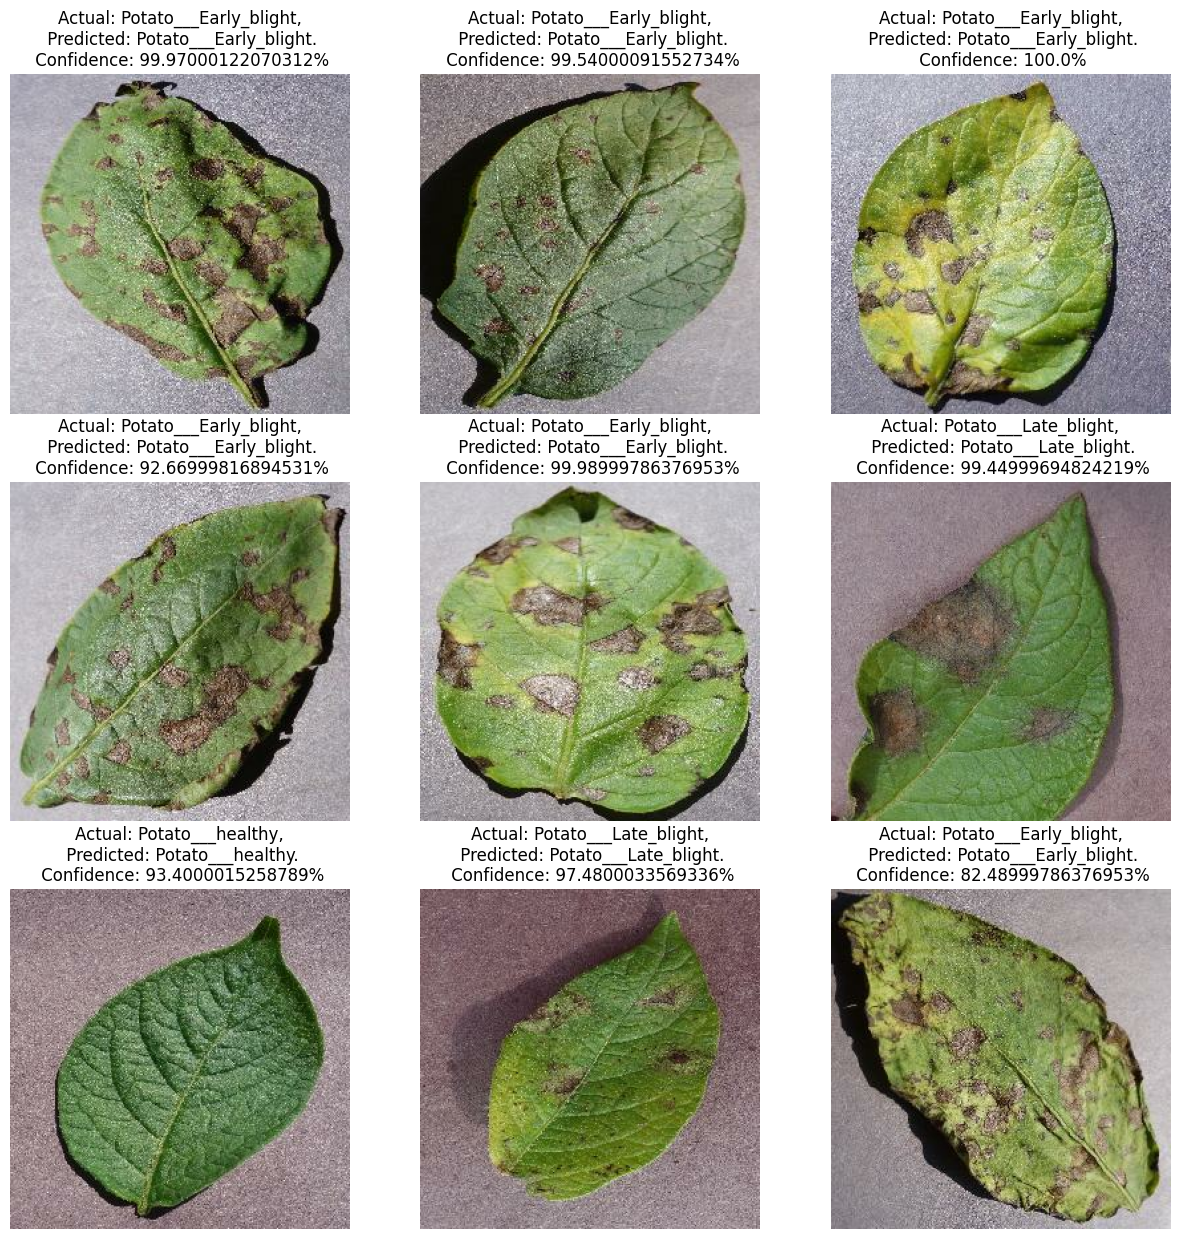

In [23]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
    plt.axis("off")

In [30]:

model.save("/content/model/model_1.keras")

In [27]:
import os
cwd = os.getcwd()
print("Current Working Directory:", cwd)

Current Working Directory: /content
